![Futuristic electric car charging](ev_charging.png)

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, understanding trends in charging facilities and sales is essential to inform strategic planning.

As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. 
___

### The Data
&nbsp;

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

In [25]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load datasets
private = pd.read_csv('private_ev_charging.csv')
public = pd.read_csv('public_ev_charging.csv')
sales = pd.read_csv('ev_sales.csv')

display(private.head(), public.head(), sales.head())

,year,private_ports,private_station_locations
0,2014,3695,1825
1,2015,4150,1962
2,2016,5763,2331
3,2017,6048,2370
4,2018,6812,2489


,year,public_ports,public_station_locations
0,2013,16619,6938
1,2014,22470,9207
2,2015,26532,10710
3,2016,33165,13150
4,2017,45789,16170


,Vehicle,year,sales
0,Chevy Volt,2011,7671.0
1,Chevy Volt,2012,23461.0
2,Chevy Volt,2013,23094.0
3,Chevy Volt,2014,18805.0
4,Chevy Volt,2015,15393.0


In [27]:
# How many vehicles were sold in 2018 in total?
ev_sales_2018 = sales[sales['year']==2018].sales.sum()
print(f'Total Sales in 2018: {ev_sales_2018}')

Total Sales in 2018: 361315.0


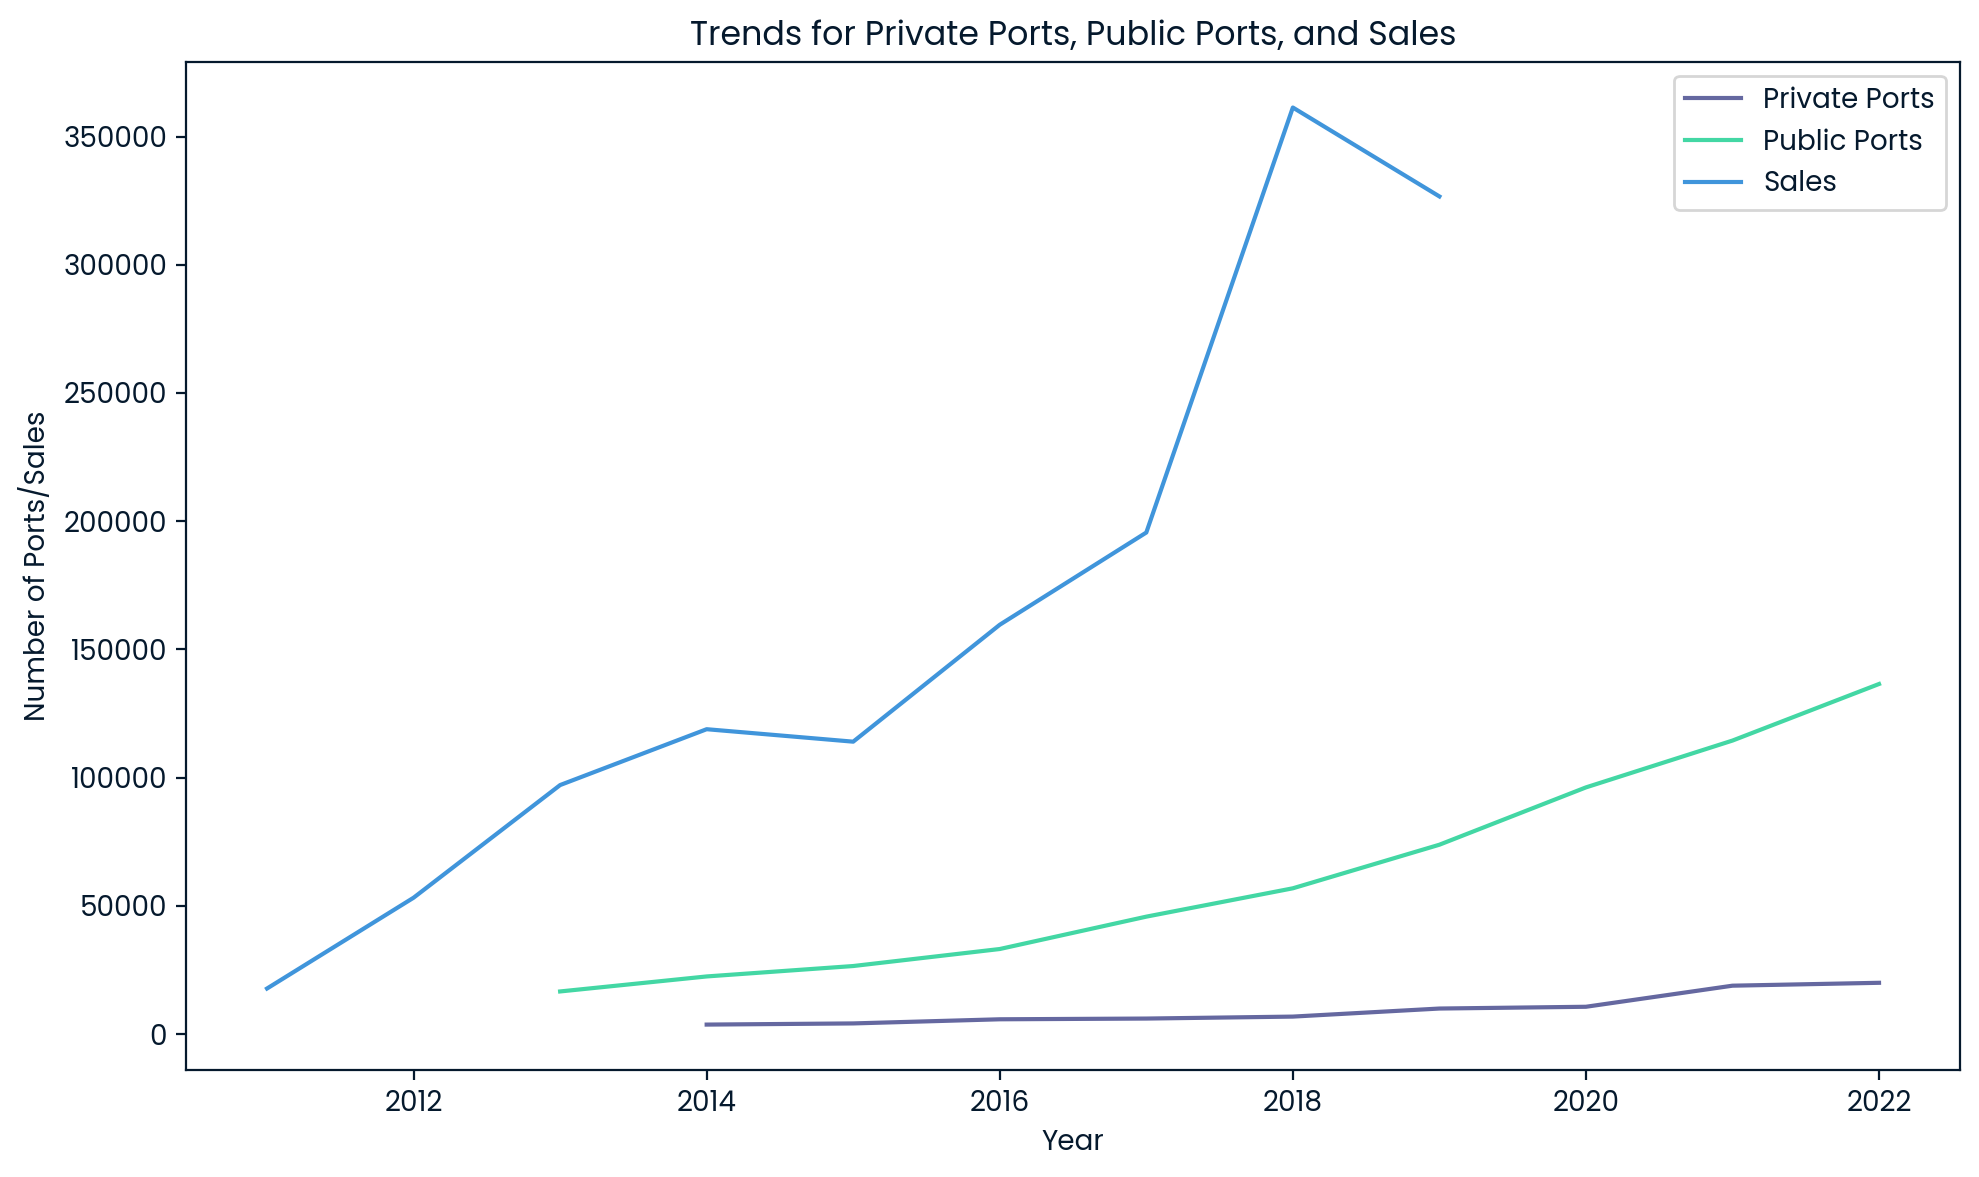

In [28]:
# create sales data grouped dataframe
sales_group = sales.groupby('year').agg({'sales':'sum'})

# Plot trends for private ports, public ports, and sales
fig, ax = plt.subplots(figsize=(10, 6))
# Plotting private ports data
sns.lineplot(x='year', y='private_ports', data=private, label='Private Ports', ax=ax)

# Plotting public ports data
sns.lineplot(x='year', y='public_ports', data=public, label='Public Ports', ax=ax)

# Plotting sales data
sns.lineplot(x='year', y='sales', data=sales_group, label='Sales', ax=ax)

# Add title and labels
ax.set_title('Trends for Private Ports, Public Ports, and Sales')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Ports/Sales')

# Show legend
ax.legend()

# Adjust the layout for better fit
plt.tight_layout()

# Display the plot
plt.show()  # Display the figure


In [29]:
# Did vehicle sales and number of private and public ports show the same trend (either increasing or decreasing) between the years 2015 and 2018?
trend = 'same'